# Preliminary exploratory data analysis
This Jupyter notebook will demostrate that the dataset can be read into R and present the data in a tidy format.

## Introduction
It is without a doubt that tennis is a very popular sport all around the world. There are several huge tournaments that occur yearly such as Wimbledon, US Open, and Australian Open. In the data set that we are working with today, it shows the statistics of the top 500 tennis players around the world. We want to analyze and tidy this data set from the original set so there’s a clear and concise set of data to use for our project. In our data set we need to tidy the set by highest rank, so number one comes out first and then second and so on. We want to see what percentage of players who are right handed versus the players who are left handed and where they fall on their rankings.

## Setup

In [1]:
library(tidyverse)
library(repr)
library(stringr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Data Reading

In [2]:
raw_data <- read_csv("player_stats.csv")
raw_data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Data Wrangling

In [31]:
tidy_data <- raw_data %>%
             select(Age:Seasons) %>%
             select(-Wikipedia, -'Best Rank') %>%
             mutate(Age = as.integer(str_sub(Age, 1, 2))) %>%
             mutate('Height(cm)' = as.integer(str_sub(Height, 1, 3))) %>%
             select(-Height) %>%
             mutate('Current Rank' = as.integer(str_remove(string = raw_data$'Current Rank', pattern = "\\(.*\\)"))) %>%
             mutate(Plays = as.factor(Plays)) %>%
             mutate(Backhand = as.factor(Backhand)) %>%
             arrange(`Current Rank`) %>%
             head(99)
tidy_data

Age,Country,Plays,Current Rank,Name,Backhand,Prize Money,Favorite Surface,Turned Pro,Seasons,Height(cm)
<int>,<chr>,<fct>,<int>,<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<int>
33,Spain,Left-handed,1,Rafael Nadal,Two-handed,"US$119,601,561",Clay 39%,2001,19,185
32,Serbia,Right-handed,2,Novak Djokovic,Two-handed,"US$ 139,144,944 All-time leader in earnings","Fast (H, G) 14%",2003,17,188
38,Switzerland,Right-handed,3,Roger Federer,One-handed,"$ 129,231,891 2nd all-time leader in earnings",Grass 36%,1998,22,185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
27,Belarus,Right-handed,98,Egor Gerasimov,Two-handed,"$360,093",None 6%,2010,7,NA
26,Austria,Right-handed,99,Dennis Novak,Two-handed,"$709,278",Clay 28%,2011,7,NA
28,United States,Right-handed,100,Tennys Sandgren,Two-handed,"$2,109,288",Grass 29%,2011,4,NA


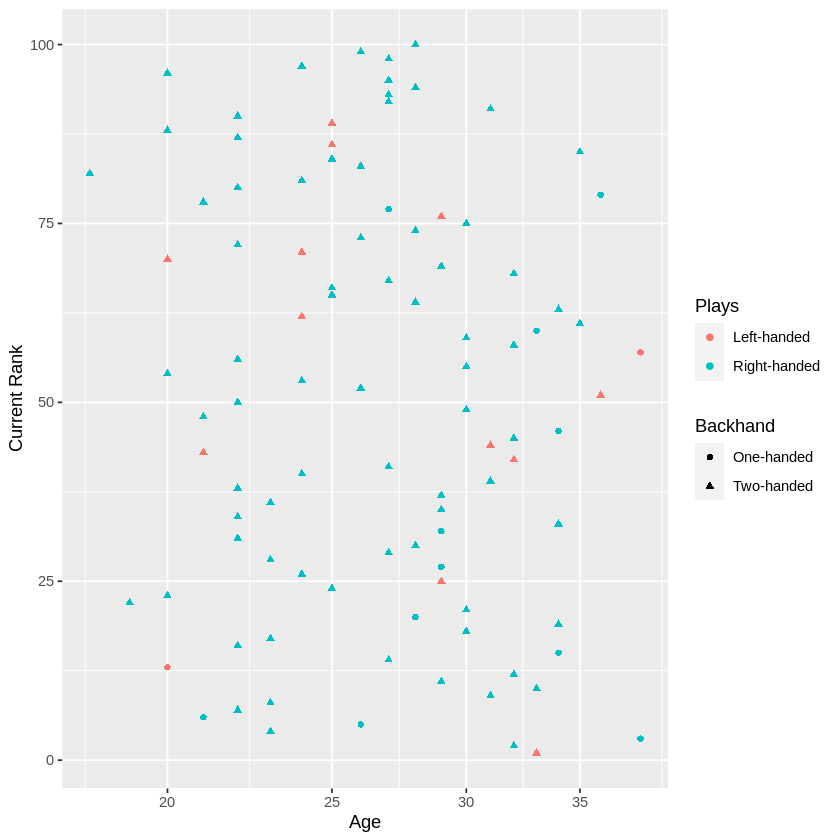

In [41]:

age_rank_plot <- tidy_data %>%
    ggplot(aes(x = Age, y = `Current Rank`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Age", y = "Current Rank", colour = "Plays", shape = "Backhand") +
        scale_x_log10()
age_rank_plot

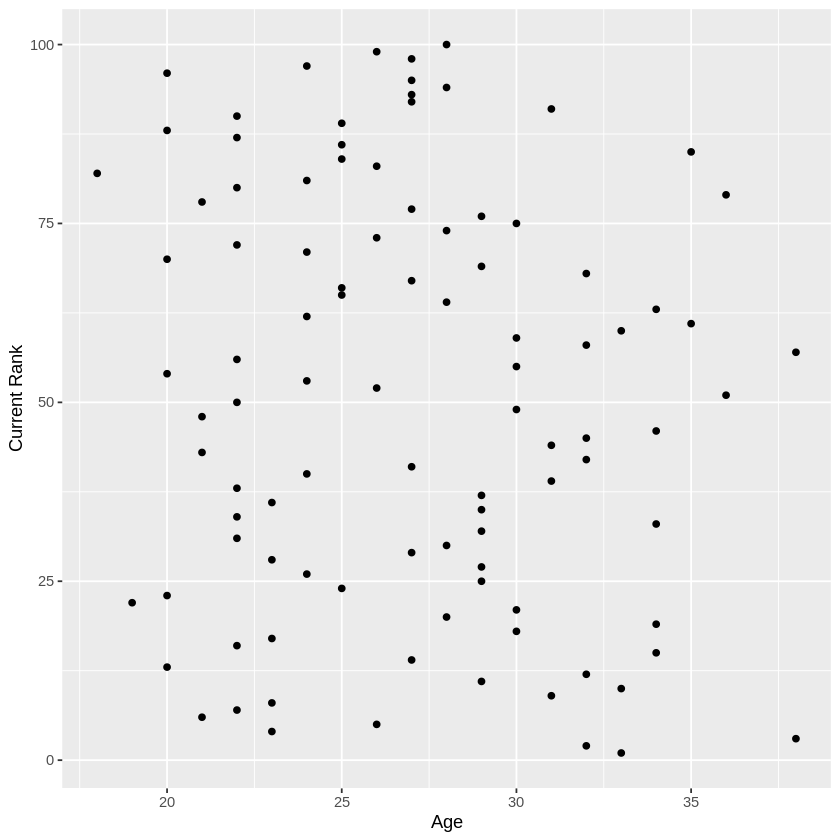

In [49]:
age_distrubution <- ggplot(tidy_data, aes(x = Age, y = `Current Rank`)) +
  geom_point(stat = 'identity')
age_distrubution

ERROR: Error in parse(text = x, srcfile = src): <text>:6:0: unexpected end of input
4:     ylab("Current Rank of 100 Players") +
5:     theme(text = element_text(size = 15)) +
  ^
